# Working with ML models for Time Series Analysis

In this section, we will prepare the data for machine learning analysis by creating lagged variables. We will work with both stationary and non-stationary data. Three of the datasets that we are using are seasonally adjusted for stationarity through differencing. The two financial datasets are only resampled from daily to monthly data.  We will create kernel density and autocorrelation plots as well as generate lag variables for a 12-time step period. We will then save these new dataframes.  These dataframes will be used in the next 3 videos.

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

## Example 1: Vacation Dataset

In [2]:
# Read in data as a panda series
# https://trends.google.com/trends/?geo=US , google trends, search the word "vacation"
# Recall that data is from 2004 to 2019
vacation = pd.read_csv("~/Desktop/section_4/vacation_firstdiff.csv", index_col=0, parse_dates=True)

            first_diff
Month                 
2004-04-01        -7.0
2004-05-01        10.0
2004-06-01         9.0
2004-07-01        -2.0
2004-08-01       -17.0


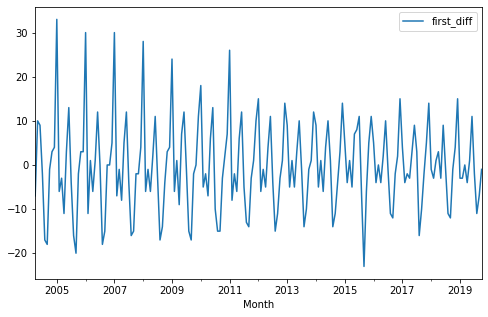

In [3]:
# display first few rows
print(vacation.head(5))
# line plot of dataset
vacation.plot(figsize=(8,5))
pyplot.show()
# data is monthly and is made stationary

The plot shows that seasonality and trend were removed from the series through differening. Above is the plot of the differenced data.

In [4]:
vacation.describe()

,first_diff
count,187.000000
mean,-0.262032
std,9.853813
min,-23.000000
25%,-6.000000
50%,-1.000000
75%,5.000000
max,33.000000


### Kernel Density Plot

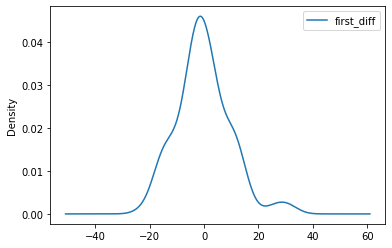

In [5]:
vacation.plot(kind='kde')

### Autocorrelation Plot 

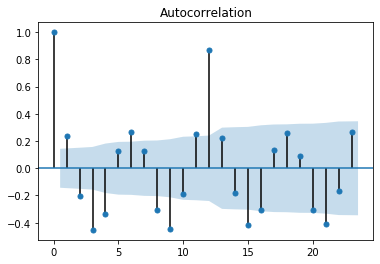

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
# Check for autocorrelation of each lagged observation and whether it is statistically significant.
plot_acf(vacation)
pyplot.show()

The blue shaded region is the margin of uncertainty. Candlesticks that extend out beyond the blue shaded region are considered statistically significant.  Correlation values are between 1 and -1.

### Create Lagged Variables

In [7]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [8]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months
for i in range(12,0,-1):
    df1[['t-'+str(i)]] = vacation.shift(i)
print(df1)

            t-12  t-11  t-10   t-9   t-8   t-7   t-6  t-5   t-4   t-3   t-2  \
Month                                                                         
2004-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   
2004-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   
2004-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  -7.0   
2004-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  -7.0  10.0   
2004-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  -7.0  10.0   9.0   
...          ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   
2019-06-01   9.0  -1.0 -11.0 -12.0  -1.0   4.0  15.0 -3.0  -3.0   0.0  -4.0   
2019-07-01  -1.0 -11.0 -12.0  -1.0   4.0  15.0  -3.0 -3.0   0.0  -4.0   1.0   
2019-08-01 -11.0 -12.0  -1.0   4.0  15.0  -3.0  -3.0  0.0  -4.0   1.0  11.0   
2019-09-01 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0 -4.0   1.0  11.0  -2.0   
2019-10-01  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0

In [9]:
# Create column t
df1['t'] = vacation.values
print(df1.head(13))

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Month                                                                          
2004-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2004-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2004-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0   
2004-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   
2004-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   9.0   
2004-09-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0   
2004-10-01   NaN   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0 -17.0   
2004-11-01   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0 -17.0 -18.0   
2004-12-01   NaN   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0 -17.0 -18.0  -1.0   
2005-01-01   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0 -17.0 -18.0  -1.0   3.0   
2005-02-01   NaN   NaN  -7.0  10.0   9.0

In [10]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
df1_vacat = df1[13:]
print(df1_vacat)

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Month                                                                          
2005-05-01  10.0   9.0  -2.0 -17.0 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0   
2005-06-01   9.0  -2.0 -17.0 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0 -11.0   
2005-07-01  -2.0 -17.0 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0 -11.0   3.0   
2005-08-01 -17.0 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0 -11.0   3.0  13.0   
2005-09-01 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0 -11.0   3.0  13.0  -4.0   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2019-06-01   9.0  -1.0 -11.0 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0   
2019-07-01  -1.0 -11.0 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0   1.0   
2019-08-01 -11.0 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0   1.0  11.0   
2019-09-01 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0   1.0  11.0  -2.0   
2019-10-01  -1.0   4.0  15.0  -3.0  -3.0

In [11]:
# save to new file
df1_vacat.to_csv('vacation_lags_12months_features.csv', index=False)

## Example 2: Furniture Dataset

In [12]:
furniture = pd.read_csv("~/Desktop/section_4/furn_pctchange.csv", index_col=0, parse_dates=True)
furniture.head()

# data is monthly and made stationary

,furniture_pct_change
Month,
1992-02-01,0.019800
1992-03-01,0.069088
1992-04-01,-0.002419
1992-05-01,0.033839
1992-06-01,0.022829


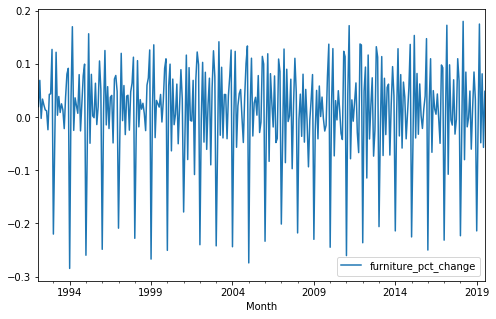

In [13]:
# line plot of dataset
furniture.plot(figsize=(8,5))
pyplot.show()

In [14]:
furniture.describe()

,furniture_pct_change
count,330.000000
mean,0.009588
std,0.094790
min,-0.284492
25%,-0.032020
50%,0.022959
75%,0.073826
max,0.179970


## Kernel Density Plot

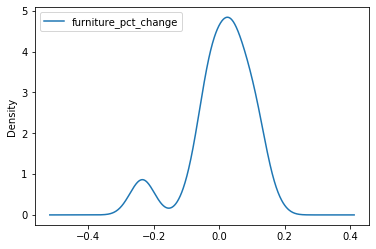

In [15]:
furniture.plot(kind='kde')

## Autocorrelation Plot 

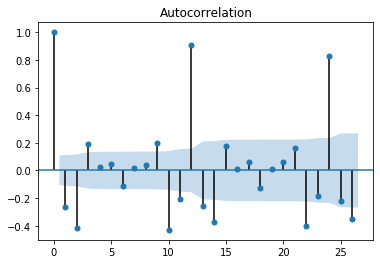

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
# Check for autocorrelation of each lagged observation and whether it is statistically significant.
plot_acf(furniture)
pyplot.show()

The blue shaded region is the margin of uncertainty. Candlesticks that extend out beyond the blue shaded region are considered statistically significant.  Correlation values are between 1 and -1.

## Create Lagged Variables

In [17]:
from pandas import DataFrame
# reframe as supervised learning
# lab observation (t-1) is the input variable and t is the output variable.
df2 = DataFrame()
# print(df2)

In [18]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months
for i in range(12,0,-1):
    df2[['t-'+str(i)]] = furniture.shift(i)
print(df2)

                t-12      t-11      t-10       t-9       t-8       t-7  \
Month                                                                    
1992-02-01       NaN       NaN       NaN       NaN       NaN       NaN   
1992-03-01       NaN       NaN       NaN       NaN       NaN       NaN   
1992-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
1992-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
1992-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2019-03-01  0.179970 -0.080049  0.084601 -0.018317 -0.001271  0.049036   
2019-04-01 -0.080049  0.084601 -0.018317 -0.001271  0.049036 -0.060266   
2019-05-01  0.084601 -0.018317 -0.001271  0.049036 -0.060266  0.017193   
2019-06-01 -0.018317 -0.001271  0.049036 -0.060266  0.017193  0.084769   
2019-07-01 -0.001271  0.049036 -0.060266  0.017193  0.084769  0.033371   

                 t-6       t-5       

In [19]:
# Create column t
df2['t'] = furniture.values
print(df2.head(13))

              t-12      t-11      t-10       t-9       t-8       t-7  \
Month                                                                  
1992-02-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-03-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-04-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-05-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-06-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-07-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-08-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-09-01     NaN       NaN       NaN       NaN       NaN  0.019800   
1992-10-01     NaN       NaN       NaN       NaN  0.019800  0.069088   
1992-11-01     NaN       NaN       NaN  0.019800  0.069088 -0.002419   
1992-12-01     NaN       NaN  0.019800  0.069088 -0.002419  0.033839   
1993-01-01     NaN  0.019800  0.069088 -0.002419  0.033839  0.02

In [20]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
df2_furn = df2[13:]
print(df2_furn)

                t-12      t-11      t-10       t-9       t-8       t-7  \
Month                                                                    
1993-03-01  0.069088 -0.002419  0.033839  0.022829  0.013640  0.011722   
1993-04-01 -0.002419  0.033839  0.022829  0.013640  0.011722 -0.023777   
1993-05-01  0.033839  0.022829  0.013640  0.011722 -0.023777  0.042725   
1993-06-01  0.022829  0.013640  0.011722 -0.023777  0.042725  0.043720   
1993-07-01  0.013640  0.011722 -0.023777  0.042725  0.043720  0.127219   
...              ...       ...       ...       ...       ...       ...   
2019-03-01  0.179970 -0.080049  0.084601 -0.018317 -0.001271  0.049036   
2019-04-01 -0.080049  0.084601 -0.018317 -0.001271  0.049036 -0.060266   
2019-05-01  0.084601 -0.018317 -0.001271  0.049036 -0.060266  0.017193   
2019-06-01 -0.018317 -0.001271  0.049036 -0.060266  0.017193  0.084769   
2019-07-01 -0.001271  0.049036 -0.060266  0.017193  0.084769  0.033371   

                 t-6       t-5       

In [21]:
# save to new file
df2_furn.to_csv('furniture_lags_12months_features.csv', index=False)

## Example 3:  Bank of America Dataset

In [22]:
bac = pd.read_csv("~/Desktop/section_4/df_bankofamerica.csv", index_col=0, parse_dates=True)
# Convert the daily data to monthly data
bac= bac.resample(rule='M').last() # Don't use how='last', deprecated
# rule is monthly
# last means last day of the month

            Adj Close Price
Date                       
1990-01-31         1.542054
1990-02-28         1.687537
1990-03-31         1.469485
1990-04-30         1.441042
1990-05-31         1.525887


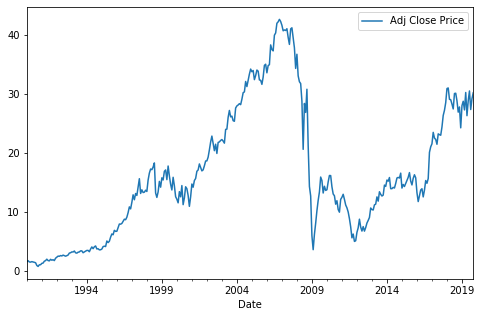

In [23]:
# display first few rows
print(bac.head(5))
# line plot of dataset
bac.plot(figsize=(8,5))
pyplot.show()

# Notice that this data is monthly but not made stationary 

In [24]:
bac.describe()

,Adj Close Price
count,358.000000
mean,16.381505
std,10.949006
min,0.709480
25%,7.886336
50%,14.250627
75%,23.992900
max,42.624523


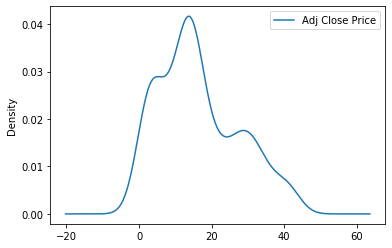

In [25]:
bac.plot(kind='kde')

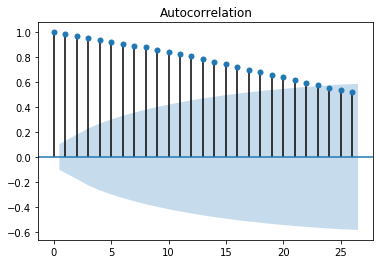

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
# Check for autocorrelation of each lagged observation and whether it is statistically significant.
plot_acf(bac)
pyplot.show()

In [27]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df3 = DataFrame()

In [28]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months
for i in range(12,0,-1):
    df3[['t-'+str(i)]] = bac.shift(i)
print(df3)

                 t-12       t-11       t-10        t-9        t-8        t-7  \
Date                                                                           
1990-01-31        NaN        NaN        NaN        NaN        NaN        NaN   
1990-02-28        NaN        NaN        NaN        NaN        NaN        NaN   
1990-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
1990-04-30        NaN        NaN        NaN        NaN        NaN        NaN   
1990-05-31        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2019-06-30  27.426815  30.043983  30.092632  28.800983  26.884829  27.764694   
2019-07-31  30.043983  30.092632  28.800983  26.884829  27.764694  24.223431   
2019-08-31  30.092632  28.800983  26.884829  27.764694  24.223431  27.988678   
2019-09-30  28.800983  26.884829  27.764694  24.223431  27.988678  28.734323   
2019-10-31  26.884829  27.764694  24.223

In [29]:
# Create column t
df3['t'] = bac.values
print(df3.head(13))

                t-12      t-11      t-10       t-9       t-8       t-7  \
Date                                                                     
1990-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1990-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
1990-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
1990-04-30       NaN       NaN       NaN       NaN       NaN       NaN   
1990-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
1990-06-30       NaN       NaN       NaN       NaN       NaN       NaN   
1990-07-31       NaN       NaN       NaN       NaN       NaN       NaN   
1990-08-31       NaN       NaN       NaN       NaN       NaN  1.542054   
1990-09-30       NaN       NaN       NaN       NaN  1.542054  1.687537   
1990-10-31       NaN       NaN       NaN  1.542054  1.687537  1.469485   
1990-11-30       NaN       NaN  1.542054  1.687537  1.469485  1.441042   
1990-12-31       NaN  1.542054  1.6875

In [30]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
df3_bac = df3[13:]
print(df3_bac)

                 t-12       t-11       t-10        t-9        t-8        t-7  \
Date                                                                           
1991-02-28   1.687537   1.469485   1.441042   1.525887   1.476664   1.412676   
1991-03-31   1.469485   1.441042   1.525887   1.476664   1.412676   1.341841   
1991-04-30   1.441042   1.525887   1.476664   1.412676   1.341841   0.879137   
1991-05-31   1.525887   1.476664   1.412676   1.341841   0.879137   0.709480   
1991-06-30   1.476664   1.412676   1.341841   0.879137   0.709480   0.987102   
...               ...        ...        ...        ...        ...        ...   
2019-06-30  27.426815  30.043983  30.092632  28.800983  26.884829  27.764694   
2019-07-31  30.043983  30.092632  28.800983  26.884829  27.764694  24.223431   
2019-08-31  30.092632  28.800983  26.884829  27.764694  24.223431  27.988678   
2019-09-30  28.800983  26.884829  27.764694  24.223431  27.988678  28.734323   
2019-10-31  26.884829  27.764694  24.223

In [31]:
# save to new file
df3_bac.to_csv('bac_lags_12months_features.csv', index=False)

## Example 4:  J.P. Morgan Dataset

In [32]:
jpm = pd.read_csv("~/Desktop/section_4/df_jpmorgan.csv", index_col=0, parse_dates=True)

# Convert the daily data to monthly data
jpm= jpm.resample(rule='M').last() # Don't use how='last', deprecated
# rule is monthly
# last means last day of the month
jpm.head()

,Adj Close Price
Date,
1990-01-31,3.098620
1990-02-28,3.083579
1990-03-31,2.884144
1990-04-30,2.884144
1990-05-31,3.377686


            Adj Close Price
Date                       
1990-01-31         3.098620
1990-02-28         3.083579
1990-03-31         2.884144
1990-04-30         2.884144
1990-05-31         3.377686


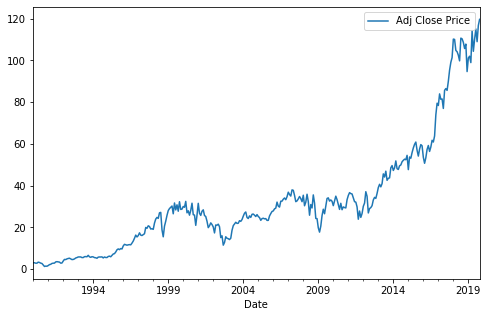

In [33]:
# display first few rows
print(jpm.head(5))
# line plot of dataset
jpm.plot(figsize=(8,5))
pyplot.show()


In [34]:
jpm.describe()

,Adj Close Price
count,358.000000
mean,32.468428
std,26.766191
min,1.319170
25%,15.462738
50%,26.977856
75%,36.008086
max,119.680000


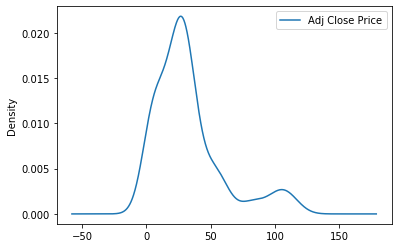

In [35]:
jpm.plot(kind='kde')

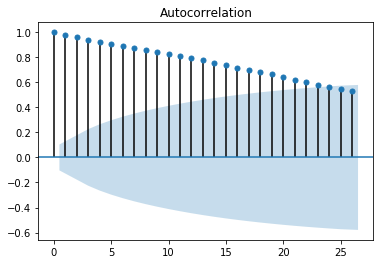

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
# Check for autocorrelation of each lagged observation and whether it is statistically significant.
plot_acf(jpm)
pyplot.show()

In [37]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df4 = DataFrame()
# print(df4)

In [38]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months
for i in range(12,0,-1):
    df4[['t-'+str(i)]] = jpm.shift(i)
print(df4)

                  t-12        t-11        t-10         t-9         t-8  \
Date                                                                     
1990-01-31         NaN         NaN         NaN         NaN         NaN   
1990-02-28         NaN         NaN         NaN         NaN         NaN   
1990-03-31         NaN         NaN         NaN         NaN         NaN   
1990-04-30         NaN         NaN         NaN         NaN         NaN   
1990-05-31         NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2019-06-30   99.800148  110.694534  110.338234  108.662643  105.719231   
2019-07-31  110.694534  110.338234  108.662643  105.719231  107.823547   
2019-08-31  110.338234  108.662643  105.719231  107.823547   94.664406   
2019-09-30  108.662643  105.719231  107.823547   94.664406  101.181450   
2019-10-31  105.719231  107.823547   94.664406  101.181450  102.022186   

                   t-7         t-6   

In [39]:
# Create column t
df4['t'] = jpm.values
print(df4.head(13))

               t-12      t-11      t-10       t-9       t-8       t-7  \
Date                                                                    
1990-01-31      NaN       NaN       NaN       NaN       NaN       NaN   
1990-02-28      NaN       NaN       NaN       NaN       NaN       NaN   
1990-03-31      NaN       NaN       NaN       NaN       NaN       NaN   
1990-04-30      NaN       NaN       NaN       NaN       NaN       NaN   
1990-05-31      NaN       NaN       NaN       NaN       NaN       NaN   
1990-06-30      NaN       NaN       NaN       NaN       NaN       NaN   
1990-07-31      NaN       NaN       NaN       NaN       NaN       NaN   
1990-08-31      NaN       NaN       NaN       NaN       NaN  3.098620   
1990-09-30      NaN       NaN       NaN       NaN  3.098620  3.083579   
1990-10-31      NaN       NaN       NaN  3.098620  3.083579  2.884144   
1990-11-30      NaN       NaN  3.098620  3.083579  2.884144  2.884144   
1990-12-31      NaN  3.098620  3.083579  2.884144  

In [40]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
df4_jpm = df4[13:]
print(df4_jpm)

                  t-12        t-11        t-10         t-9         t-8  \
Date                                                                     
1991-02-28    3.083579    2.884144    2.884144    3.377686    3.223591   
1991-03-31    2.884144    2.884144    3.377686    3.223591    2.907553   
1991-04-30    2.884144    3.377686    3.223591    2.907553    2.733733   
1991-05-31    3.377686    3.223591    2.907553    2.733733    2.019471   
1991-06-30    3.223591    2.907553    2.733733    2.019471    1.319170   
...                ...         ...         ...         ...         ...   
2019-06-30   99.800148  110.694534  110.338234  108.662643  105.719231   
2019-07-31  110.694534  110.338234  108.662643  105.719231  107.823547   
2019-08-31  110.338234  108.662643  105.719231  107.823547   94.664406   
2019-09-30  108.662643  105.719231  107.823547   94.664406  101.181450   
2019-10-31  105.719231  107.823547   94.664406  101.181450  102.022186   

                   t-7         t-6   

In [41]:
# save to new file
df4_jpm.to_csv('jpm_lags_12months_features.csv', index=False)

## Example 5:  Average Temperature of St. Louis dataset

In [42]:
temp = pd.read_csv("~/Desktop/section_4/temp_diffmean.csv", index_col=0, parse_dates=True)

            diff_mean
Date                 
1938-04-01   0.050412
1938-05-01   8.250412
1938-06-01  17.050412
1938-07-01  23.950412
1938-08-01  24.850412


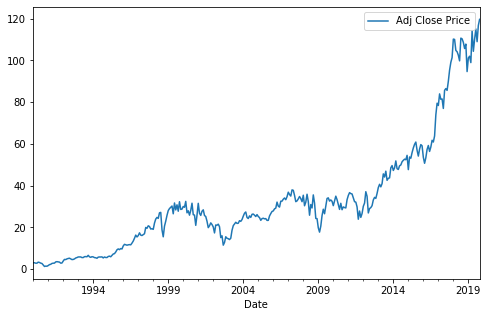

In [43]:
# display first few rows
print(temp.head(5))
# line plot of dataset
jpm.plot(figsize=(8,5))
pyplot.show()

# Notice that this is monthly and stationary data

In [44]:
# summary statistics
temp.describe()


,diff_mean
count,9.700000e+02
mean,-3.254579e-14
std,1.753885e+01
min,-4.264959e+01
25%,-1.594959e+01
50%,1.800412e+00
75%,1.675041e+01
max,3.145041e+01


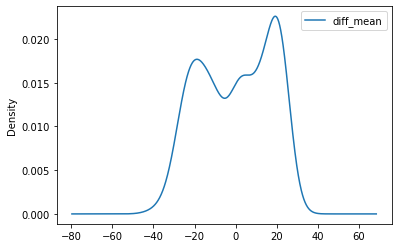

In [45]:
# kerndel density plot
temp.plot(kind='kde')

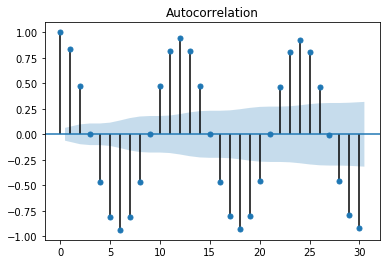

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
# Check for autocorrelation of each lagged observation and whether it is statistically significant.
plot_acf(temp)
pyplot.show()

In [47]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df5 = DataFrame()
# print(df5)

In [48]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months
for i in range(12,0,-1):
    df5[['t-'+str(i)]] = temp.shift(i)
print(df5)

                 t-12       t-11       t-10        t-9        t-8        t-7  \
Date                                                                           
1938-04-01        NaN        NaN        NaN        NaN        NaN        NaN   
1938-05-01        NaN        NaN        NaN        NaN        NaN        NaN   
1938-06-01        NaN        NaN        NaN        NaN        NaN        NaN   
1938-07-01        NaN        NaN        NaN        NaN        NaN        NaN   
1938-08-01        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2018-09-01  16.250412   5.150412  -8.349588 -21.549588 -26.649588 -18.449588   
2018-10-01   5.150412  -8.349588 -21.549588 -26.649588 -18.449588 -13.349588   
2018-11-01  -8.349588 -21.549588 -26.649588 -18.449588 -13.349588  -6.549588   
2018-12-01 -21.549588 -26.649588 -18.449588 -13.349588  -6.549588  18.950412   
2019-01-01 -26.649588 -18.449588 -13.349

In [49]:
# Create column t
df5['t'] = temp.values
print(df5.head(13))


                t-12      t-11       t-10        t-9        t-8        t-7  \
Date                                                                         
1938-04-01       NaN       NaN        NaN        NaN        NaN        NaN   
1938-05-01       NaN       NaN        NaN        NaN        NaN        NaN   
1938-06-01       NaN       NaN        NaN        NaN        NaN        NaN   
1938-07-01       NaN       NaN        NaN        NaN        NaN        NaN   
1938-08-01       NaN       NaN        NaN        NaN        NaN        NaN   
1938-09-01       NaN       NaN        NaN        NaN        NaN        NaN   
1938-10-01       NaN       NaN        NaN        NaN        NaN        NaN   
1938-11-01       NaN       NaN        NaN        NaN        NaN   0.050412   
1938-12-01       NaN       NaN        NaN        NaN   0.050412   8.250412   
1939-01-01       NaN       NaN        NaN   0.050412   8.250412  17.050412   
1939-02-01       NaN       NaN   0.050412   8.250412  17.050412 

In [50]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
df5_temp = df5[13:]
print(df5_temp)

                 t-12       t-11       t-10        t-9        t-8        t-7  \
Date                                                                           
1939-05-01   8.250412  17.050412  23.950412  24.850412  15.650412   6.550412   
1939-06-01  17.050412  23.950412  24.850412  15.650412   6.550412 -10.549588   
1939-07-01  23.950412  24.850412  15.650412   6.550412 -10.549588 -21.549588   
1939-08-01  24.850412  15.650412   6.550412 -10.549588 -21.549588 -18.749588   
1939-09-01  15.650412   6.550412 -10.549588 -21.549588 -18.749588 -23.749588   
...               ...        ...        ...        ...        ...        ...   
2018-09-01  16.250412   5.150412  -8.349588 -21.549588 -26.649588 -18.449588   
2018-10-01   5.150412  -8.349588 -21.549588 -26.649588 -18.449588 -13.349588   
2018-11-01  -8.349588 -21.549588 -26.649588 -18.449588 -13.349588  -6.549588   
2018-12-01 -21.549588 -26.649588 -18.449588 -13.349588  -6.549588  18.950412   
2019-01-01 -26.649588 -18.449588 -13.349

In [51]:
# save to new file
df5_temp.to_csv('temp_lags_12months_features.csv', index=False)

In [ ]:
# End